# Simulated Annealing

## Annealing
When a metal is heated to a high temperature quickly and then gradually cooled. At high temperatures, the atoms move fast, and when the temperature is reduced, their kinetic enerly decreases as well. At the end of the annealing process, the atoms fall into more ordered state, and the material is more ductile and easier to work with.

## Simulated Annealing
Simulated annealing process starts with high-energy state(an initial solution) and gradually lowers the temperature(a control parameter) untill it reaches a state of minimum energy(the optimal solution).

### Appliations
- Travelling Sales person's problem
- Protein Folding
- Graph partitioning
- Job-shop Scheduing

The main advantage of SA is its ability to escape from local minima and converge to a global minimum.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import display, clear_output
import math
import time

## Travelling Sales Person problem

The Traveling Salesperson Problem (TSP) is a classic optimization problem in which the goal is to determine the shortest possible route that allows a salesperson to visit each city exactly once and return to the original city. The challenge lies in finding the most efficient path among a set of cities, minimizing the total travel distance or cost. TSP is an NP-hard problem, meaning that as the number of cities increases, the problem becomes exponentially harder to solve. It has applications in logistics, planning, and scheduling.

It consists of multiples cities and distance between them.

## Algorithm
Simulated Annealing starts with initial solution and iteratively improves current solution by randomly changing it and accepting the change with certain probability.

### Define the problem
First we need to define the problem to optimize. This involves defining the energy function, i.e. the funciton to minimize or maximize.

Once the energy function is defined, we need to set the intial temperature value and initial candidate solution.

In [33]:
init_temp = 100
energy_th = 10
temp_th = 0.1
cooling_rate = 0.99


# defining total x any y distance
x_max = 100
y_max = 100

# initilizing TSP
city_num = 30
city_nodes = np.random.rand(city_num, 2)
city_nodes = city_nodes * np.array([x_max, y_max])
state = city_nodes

# choosing intial state
np.random.shuffle(city_nodes)
print(state)

[[61.13756522 38.05385   ]
 [ 2.9756434  36.2003825 ]
 [90.43266295  9.43808258]
 [69.54382823 16.00183644]
 [70.38880904 32.79978956]
 [26.39637654 60.80408898]
 [92.56981179 25.42267014]
 [86.10403914 93.76740932]
 [47.2494385  60.68726286]
 [38.05753386 72.76826277]
 [29.34628104 55.50100026]
 [14.64503629 80.04896575]
 [13.54704004 68.31896558]
 [95.41357436 18.24006696]
 [61.27601237 37.34242424]
 [65.81939881 47.05611344]
 [96.4943442  32.74447083]
 [49.57759763 30.36724142]
 [52.24667507 48.96841293]
 [56.3909494  49.11344984]
 [79.07388919 86.88398694]
 [42.80807625 68.72494948]
 [ 7.50157441 90.0348744 ]
 [ 4.3225581  39.9467635 ]
 [40.19945832 67.52731254]
 [ 4.92840918 54.32256453]
 [ 5.39269963 28.53712261]
 [77.34497618 61.64635531]
 [75.72435832 92.7276308 ]
 [61.95980781 32.65311652]]


Plotting the cities using matplot lib

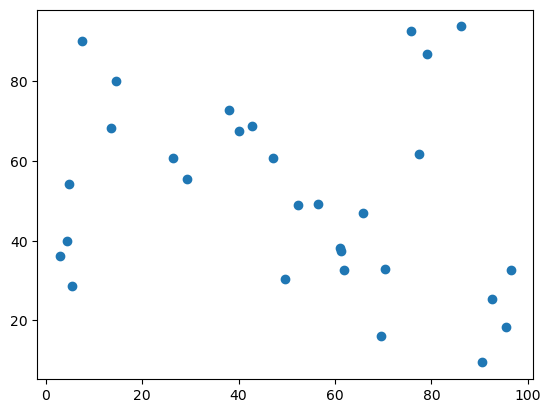

In [36]:
fig, ax = plt.subplots()
ax.scatter(city_nodes[:, 0], city_nodes[:, 1])
plt.show()

Plotting our initial state

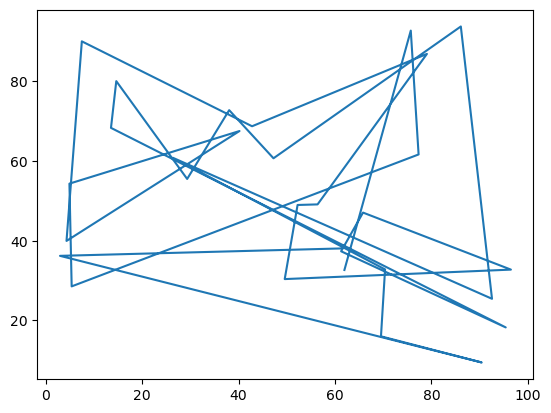

In [37]:
fig, ax = plt.subplots()
ax.plot(state[:, 0], state[:, 1])
plt.show()

### Calculating energy of the state
This is the function the algorithm is required to minimize. For TSP energy of the state is total length of travel.

In [38]:
def calc_energy(state):
    length = 0
    for i in range(1, state.shape[0]):
        length += np.sqrt(np.sum(np.square(state[i - 1, :] - state[i, :])))
    return length

In [39]:
calc_energy(state)

np.float64(1216.4329535232855)

## Finding new state
We need to find new state to compare with the current state. In TSP this is done by swapping two cities in travelling order.

In [40]:
def new_candidate(state):
    i = random.randint(0, state.shape[0] - 1)
    j = random.randint(0, state.shape[0] - 1)
    new_state = state.copy()
    new_state[[i, j]] = new_state[[j, i]]
    return new_state

In [41]:
new_candidate(state)

array([[61.13756522, 38.05385   ],
       [ 2.9756434 , 36.2003825 ],
       [90.43266295,  9.43808258],
       [69.54382823, 16.00183644],
       [70.38880904, 32.79978956],
       [26.39637654, 60.80408898],
       [92.56981179, 25.42267014],
       [86.10403914, 93.76740932],
       [47.2494385 , 60.68726286],
       [38.05753386, 72.76826277],
       [29.34628104, 55.50100026],
       [14.64503629, 80.04896575],
       [13.54704004, 68.31896558],
       [95.41357436, 18.24006696],
       [61.27601237, 37.34242424],
       [65.81939881, 47.05611344],
       [96.4943442 , 32.74447083],
       [ 4.92840918, 54.32256453],
       [52.24667507, 48.96841293],
       [56.3909494 , 49.11344984],
       [79.07388919, 86.88398694],
       [42.80807625, 68.72494948],
       [ 7.50157441, 90.0348744 ],
       [ 4.3225581 , 39.9467635 ],
       [40.19945832, 67.52731254],
       [49.57759763, 30.36724142],
       [ 5.39269963, 28.53712261],
       [77.34497618, 61.64635531],
       [75.72435832,

In [42]:
def TSP_solution(init_state):
    state = init_state
    temp = init_temp
    energy = calc_energy(state)
    fig,ax = plt.subplots()
    ax.set_xlim(0,x_max)
    ax.set_ylim(0,y_max)
    while energy > energy_th and temp > temp_th:
        ax.cla()
        new_state = new_candidate(state)
        energy_new = calc_energy(new_state)
        delta  = energy_new - energy
        if delta<0 or random.uniform(0,1)<math.exp(-delta/temp):
            state = new_state
            energy = energy_new
        # print(math.exp(-delta/temp))
        ax.plot(state[:, 0], state[:, 1])
        display(fig)
        print(energy,temp)
        temp = temp * cooling_rate
        clear_output(wait = True)
        plt.pause(0.1)
    plt.show()
    return state,energy

In [43]:
TSP_solution(state)

(array([[90.43266295,  9.43808258],
        [95.41357436, 18.24006696],
        [92.56981179, 25.42267014],
        [96.4943442 , 32.74447083],
        [69.54382823, 16.00183644],
        [61.27601237, 37.34242424],
        [49.57759763, 30.36724142],
        [61.95980781, 32.65311652],
        [65.81939881, 47.05611344],
        [56.3909494 , 49.11344984],
        [47.2494385 , 60.68726286],
        [40.19945832, 67.52731254],
        [38.05753386, 72.76826277],
        [ 7.50157441, 90.0348744 ],
        [14.64503629, 80.04896575],
        [26.39637654, 60.80408898],
        [29.34628104, 55.50100026],
        [42.80807625, 68.72494948],
        [75.72435832, 92.7276308 ],
        [79.07388919, 86.88398694],
        [13.54704004, 68.31896558],
        [ 4.92840918, 54.32256453],
        [ 4.3225581 , 39.9467635 ],
        [ 2.9756434 , 36.2003825 ],
        [ 5.39269963, 28.53712261],
        [52.24667507, 48.96841293],
        [61.13756522, 38.05385   ],
        [70.38880904, 32.799

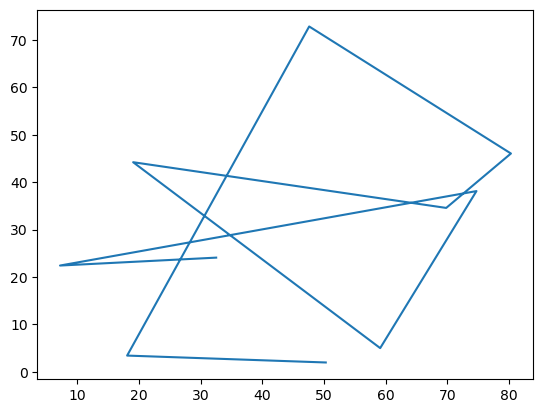

In [22]:
fig, ax = plt.subplots()
ax.plot(state[:, 0], state[:, 1])
plt.show()